### Import packages

In [62]:
#Calculations
import math
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors, cm, ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes

    
#Other
from single_file_simulation_tools import *
from waiting_time_tools import *
from entropy_tools      import *

### Set Latex plot font

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family']      = 'STIXGeneral'
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams.update({'errorbar.capsize': 4})
mpl.rcParams['axes.linewidth'] = 2

### Set constants for single-file system with uniform bias

In [27]:
Nsteps = 10**6         #Number of discrete steps
Nsites = 5             #Number of sites
Nvacancies = 1         #Number of vacancies
Nmilestones = 3        #Number of milestones
pbias = 0.5            #Jump probabilities
scenario = 0           #0: uniform bias, 1: tagged particle bias, 2: bath particle bias
waiting_time = False   #Waiting time on the microscopic level 
                       #i.e. do we only track changes in the particle positions, 
                       #or also the waiting in equal microscopic states?

### Run single-file system with uniform bias

In [47]:
%%time
full_traj, lump_traj, mil_traj = single_file(Nsteps,Nsites,Nvacancies,Nmilestones,pbias,scenario,waiting_time)

CPU times: user 185 ms, sys: 128 µs, total: 185 ms
Wall time: 186 ms


### Determine backward milestoned trajectory (to show kinetic hysteresis)

In [48]:
#Set step limit
step_lim = 300

#Compute milestoned backward trajectory
milestonelist = np.ceil(Nsites*np.arange(0,Nmilestones,1)/Nmilestones)
mil_traj_back, counter = np.zeros((step_lim)), 0
for i in range(step_lim): 
    if lump_traj[step_lim-1-i] in milestonelist: 
        mil_traj_back[step_lim-1-i] = np.where(lump_traj[step_lim-1-i] == milestonelist)[0]
        if counter == 0: counter = i
    elif i != 0: mil_traj_back[step_lim-1-i] = mil_traj_back[step_lim-i]

#Set initial milestone in the backward trajectory
mil_traj_back[step_lim-counter:step_lim] = mil_traj_back[step_lim-1-counter]

### Plot trajectories

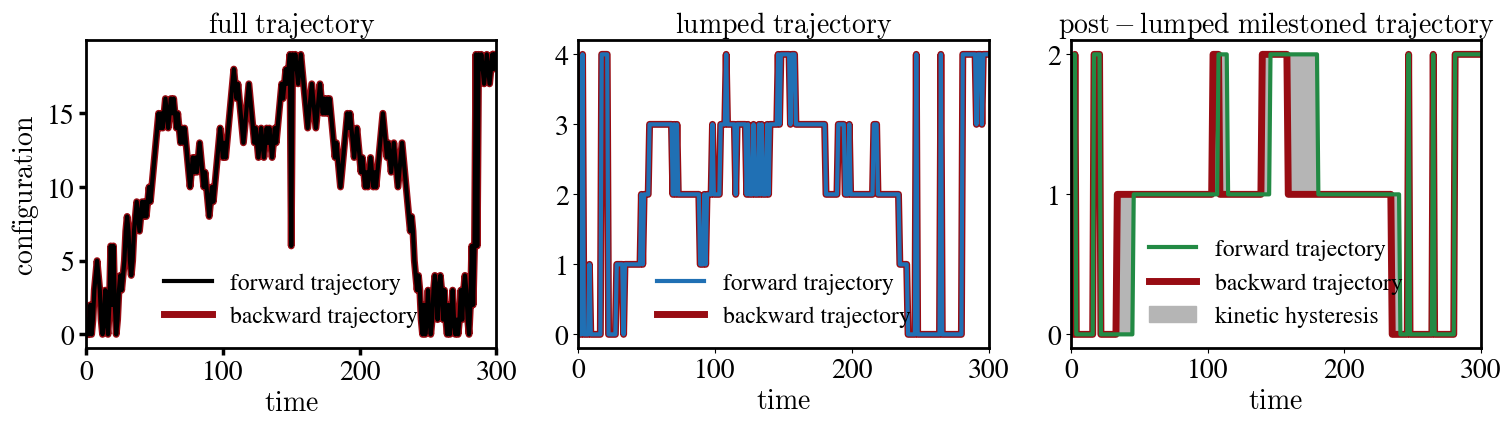

In [50]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4))
ax.ravel()

#Plot forward trajectories
ax[0].plot(full_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = 'black');
ax[1].plot(lump_traj[0:step_lim], linewidth = 3, label = r'forward trajectory', color = cm.Blues(0.75));
ax[2].plot(mil_traj[0:step_lim], linewidth = 3,  label = r'forward trajectory',  color = cm.Greens(0.75));

#Plot backward trajectories
ax[0].plot(full_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[1].plot(lump_traj[0:step_lim], label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9), zorder = -1);
ax[2].plot(mil_traj_back,         label = r'backward trajectory', linewidth = 5, color = cm.Reds(0.9),         zorder = -1);

#Explicitly highlight the kinetic hysteresis
ax[2].fill_between(np.arange(0, step_lim, 1), mil_traj[0:step_lim], mil_traj_back, color = cm.Greys(0.4), zorder = -2, label = r'kinetic hysteresis')

#Set labels
ax[0].set_xlabel(r'${\rm time}$', size = 20);
ax[1].set_xlabel(r'${\rm time}$', size = 20);
ax[2].set_xlabel(r'${\rm time}$', size = 20);
ax[0].set_ylabel(r'$\rm configuration$', size = 20);

#Set axis limits
ax[0].set_xlim([0,step_lim]);
ax[1].set_xlim([0,step_lim]);
ax[2].set_xlim([0,step_lim]);

#Set axis ticks
ax[2].set_yticks([0,1,2],['0','1','2'])

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm full \ trajectory$',                     fontsize = 20);
ax[1].set_title(r'$\rm lumped \ trajectory$',                   fontsize = 20);
ax[2].set_title(r'$\rm post-lumped \ milestoned \ trajectory$', fontsize = 20);

#Plot legend
ax[0].legend(frameon = False, fontsize = 17);
ax[1].legend(frameon = False, fontsize = 17);
ax[2].legend(frameon = False, fontsize = 17);

#Save figure
plt.savefig('./Plots/single_file_kinetic_hysteresis.pdf', bbox_inches = 'tight', dpi = 100)

### Plot waiting-time distributions for milestoned trajectory (this only works when Nmilestones = 3)

In [86]:
#Collect waiting-time statistics for each of the three milestones
psi0min, psi0plus, psi1plus, psi1min, psi2min, psi2plus = waiting_time_module(mil_traj)

#Analaytical waiting-time distributions
k_arr = np.arange(1,400,1) 
psi0minana,  psi0plusana, psi1plusana, psi1minana, psi2minana,  psi2plusana = analytical_waiting_times(Nsites,Nmilestones,pbias,k_arr)

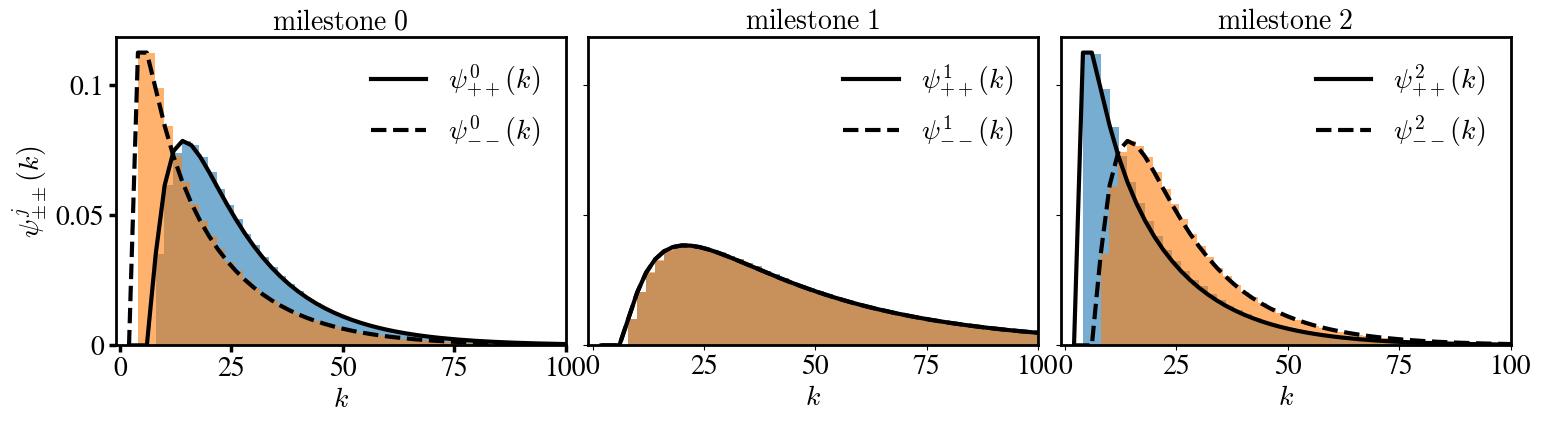

In [87]:
#Figure settings
fig, ax = plt.subplots(1,3, figsize = (18,4), sharey = True)
ax.ravel()

#Compute histograms
counts1, bins1 = np.histogram(psi0min,  bins = 110)
counts2, bins2 = np.histogram(psi0plus, bins = 125)
counts3, bins3 = np.histogram(psi1min,  bins = 210)
counts4, bins4 = np.histogram(psi1plus, bins = 240)
counts5, bins5 = np.histogram(psi2min,  bins = 105)
counts6, bins6 = np.histogram(psi2plus, bins = 140)

#Plot histograms
ax[0].stairs(counts2/np.sum(counts2), bins2, fill = True, alpha = 0.6)
ax[0].stairs(counts1/np.sum(counts1), bins1, fill = True, alpha = 0.6)

ax[1].stairs(counts4/np.sum(counts4), bins4, fill = True, alpha = 0.6)
ax[1].stairs(counts3/np.sum(counts3), bins3, fill = True, alpha = 0.6)

ax[2].stairs(counts6/np.sum(counts6), bins6, fill = True, alpha = 0.6)
ax[2].stairs(counts5/np.sum(counts5), bins5, fill = True, alpha = 0.6)

#Plot analytical solutions
ax[0].plot(k_arr[1::2], psi0plusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{0}_{++}(k)$')
ax[0].plot(k_arr[1::2], psi0minana[1::2],  color = 'black', linewidth = 3, linestyle = '--',  label = r'$\psi^{0}_{--}(k)$')
ax[1].plot(k_arr[1::2], psi1plusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{1}_{++}(k)$')
ax[1].plot(k_arr[1::2], psi1minana[1::2],  color = 'black', linewidth = 3, linestyle = '--', label = r'$\psi^{1}_{--}(k)$')
ax[2].plot(k_arr[1::2], psi2plusana[1::2], color = 'black', linewidth = 3, label = r'$\psi^{2}_{++}(k)$')
ax[2].plot(k_arr[1::2], psi2minana[1::2],  color = 'black', linewidth = 3, linestyle = '--', label = r'$\psi^{2}_{--}(k)$')

#Set tick sizes
ax[0].tick_params('both', length=5, width=2.5, which='major');
ax[0].xaxis.set_tick_params(labelsize=20), ax[0].yaxis.set_tick_params(labelsize=20);
ax[1].xaxis.set_tick_params(labelsize=20), ax[1].yaxis.set_tick_params(labelsize=20);
ax[2].xaxis.set_tick_params(labelsize=20), ax[2].yaxis.set_tick_params(labelsize=20);

#Add titles
ax[0].set_title(r'$\rm milestone \ 0$', fontsize = 20);
ax[1].set_title(r'$\rm milestone \ 1$', fontsize = 20);
ax[2].set_title(r'$\rm milestone \ 2$', fontsize = 20);

#Set labels
ax[0].set_xlabel(r'$k$', size = 20);
ax[1].set_xlabel(r'$k$', size = 20);
ax[2].set_xlabel(r'$k$', size = 20);
ax[0].set_ylabel(r'$\psi^{j}_{\pm\pm}(k)$', size = 20);

#Set axis-limits
axlim = 100
ax[0].set_xlim([-1,axlim]);
ax[1].set_xlim([-1,axlim]);
ax[2].set_xlim([-1,axlim]);

#Set axis ticks
ax[0].set_yticks([0,0.05,0.1],['0','0.05','0.1'])

#Plot legend
ax[0].legend(frameon = False, fontsize = 20)
ax[1].legend(frameon = False, fontsize = 20)
ax[2].legend(frameon = False, fontsize = 20)

#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Save figure
#plt.savefig('./Plots/waiting_time_distribution3.pdf', bbox_inches = 'tight', dpi = 100)

### Save waiting-time distributions

In [88]:
np.save('psi0minsf.npy',  psi0min,  allow_pickle=True, fix_imports=True)
np.save('psi0plussf.npy', psi0plus, allow_pickle=True, fix_imports=True)
np.save('psi1minsf.npy',  psi1min,  allow_pickle=True, fix_imports=True)
np.save('psi1plussf.npy', psi1plus, allow_pickle=True, fix_imports=True)
np.save('psi2minsf.npy',  psi2min,  allow_pickle=True, fix_imports=True)
np.save('psi2plussf.npy', psi2plus, allow_pickle=True, fix_imports=True)

### Calculate entropy production with first order semi-Markov approximation for various ring sizes and vacancies

In [ ]:
#Set constants
Nsteps = 10**7
Nslots = 9
Nmilestones = 3
pbias = 0.45

#Initialize arrays
Q1_lumped        = np.zeros((3,Nslots-1,3))
Q1_mil           = np.zeros((3,Nslots-1,3))
Q1_lumpedTUR     = np.zeros((3,Nslots-1,3))
Q1_milTUR        = np.zeros((3,Nslots-1,3))

In [ ]:
%%time
for i in range(1,4):
    for j in range(1,3*i):
        for k in range(3):
        
            #Construct trajectories (0)
            full_traj, lump_traj, mil_traj = single_file(Nsteps,3*i,j,Nmilestones,pbias,k,True)
        
            #Calculate entropy production
            exact_entropy  = markov_entropy_calculator(full_traj,1)
            lump_entropy   = markov_entropy_calculator(lump_traj,1)
            mil_entropy    = markov_entropy_calculator(mil_traj,1)
            lump_TUR_entropy = TUR_entropy_calculator(lump_traj,3*i)
            mil_TUR_entropy  = TUR_entropy_calculator(mil_traj,3)
        
            #Calculate quality factors
            Q1_lumped[i-1,j-1,k]    = lump_entropy/exact_entropy
            Q1_mil[i-1,j-1,k]       = mil_entropy/exact_entropy
            Q1_lumpedTUR[i-1,j-1,k] = lump_TUR_entropy/exact_entropy
            Q1_milTUR[i-1,j-1,k]    = mil_TUR_entropy/exact_entropy
        
            print(i,j,k,Q1_lumped[i-1,j-1,k],Q1_mil[i-1,j-1,k],Q1_lumpedTUR[i-1,j-1,k],Q1_milTUR[i-1,j-1,k])

### Show data

Q1_lumped = np.array([[[0.49988195, 0.50138622, 0.49910064],
        [1.        , 1.        , 1.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.1998806 , 0.20108983, 0.19778235],
        [0.25004502, 0.24747717, 0.24748943],
        [0.33320874, 0.33111996, 0.33076154],
        [0.50027881, 0.50084977, 0.49814978],
        [1.        , 1.        , 1.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.12497036, 0.1254322 , 0.12268536],
        [0.1423213 , 0.10730887, 0.13880402],
        [0.16372335, 0.10260066, 0.16072935],
        [0.19618235, 0.1344116 , 0.19211112],
        [0.24715279, 0.21124077, 0.24250602],
        [0.33217046, 0.32270491, 0.32821739],
        [0.49939989, 0.49948886, 0.49728743],
        [1.        , 1.        , 1.        ]]])

Q1_mil = np.array([[[0.49987811, 0.50139442, 0.49910874],
        [0.99999808, 0.9999981 , 0.9993489 ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.60224713, 0.60771559, 0.60136921],
        [0.46265396, 0.46507296, 0.46451027],
        [0.47261893, 0.47008258, 0.47045945],
        [0.58268158, 0.58466013, 0.58104736],
        [0.99956913, 1.00012361, 1.00201337],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.69401682, 0.71385895, 0.70446818],
        [0.59428958, 0.45299891, 0.59544254],
        [0.48079905, 0.30839894, 0.4782911 ],
        [0.43206683, 0.30428824, 0.43192067],
        [0.42871389, 0.37123165, 0.4252791 ],
        [0.46946764, 0.46072175, 0.46681488],
        [0.58763339, 0.59115078, 0.58855205],
        [0.99872979, 1.00026732, 1.00032512]]])

Q1_lumpedTUR = np.array([[[0.49823165, 0.50095941, 0.49867464],
        [0.99672632, 0.99667337, 0.99999905],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.19918519, 0.20105517, 0.19735303],
        [0.24921662, 0.24742014, 0.24702424],
        [0.33210535, 0.33099503, 0.33027733],
        [0.49857984, 0.50043967, 0.49772822],
        [0.99669442, 0.99665971, 0.99999418],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.12449724, 0.12533943, 0.12233746],
        [0.14179365, 0.1072838 , 0.13845715],
        [0.16316093, 0.10258064, 0.16036121],
        [0.19551329, 0.13436951, 0.19169739],
        [0.2463248 , 0.21119138, 0.24204439],
        [0.33106126, 0.32258003, 0.3277398 ],
        [0.49774238, 0.49907342, 0.49686922],
        [0.99670987, 0.99672603, 0.99999897]]])

Q1_milTUR = np.array([[[0.49822785, 0.50096759, 0.49868273],
        [0.99672442, 0.99667148, 0.99934843],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.53898627, 0.60468543, 0.55949606],
        [0.44274388, 0.46376609, 0.45276712],
        [0.46037427, 0.46866332, 0.46496977],
        [0.57213283, 0.58206894, 0.57839076],
        [0.98642419, 0.98681877, 1.00201276],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.38643868, 0.70377324, 0.42642284],
        [0.40143234, 0.44717197, 0.43461548],
        [0.38486695, 0.30619534, 0.40677292],
        [0.37753461, 0.3022996 , 0.39497668],
        [0.39358118, 0.36900536, 0.40450821],
        [0.44310905, 0.45752624, 0.45484349],
        [0.56440685, 0.58510685, 0.58242635],
        [0.96988853, 0.97144889, 1.00032307]]])

### Plot data

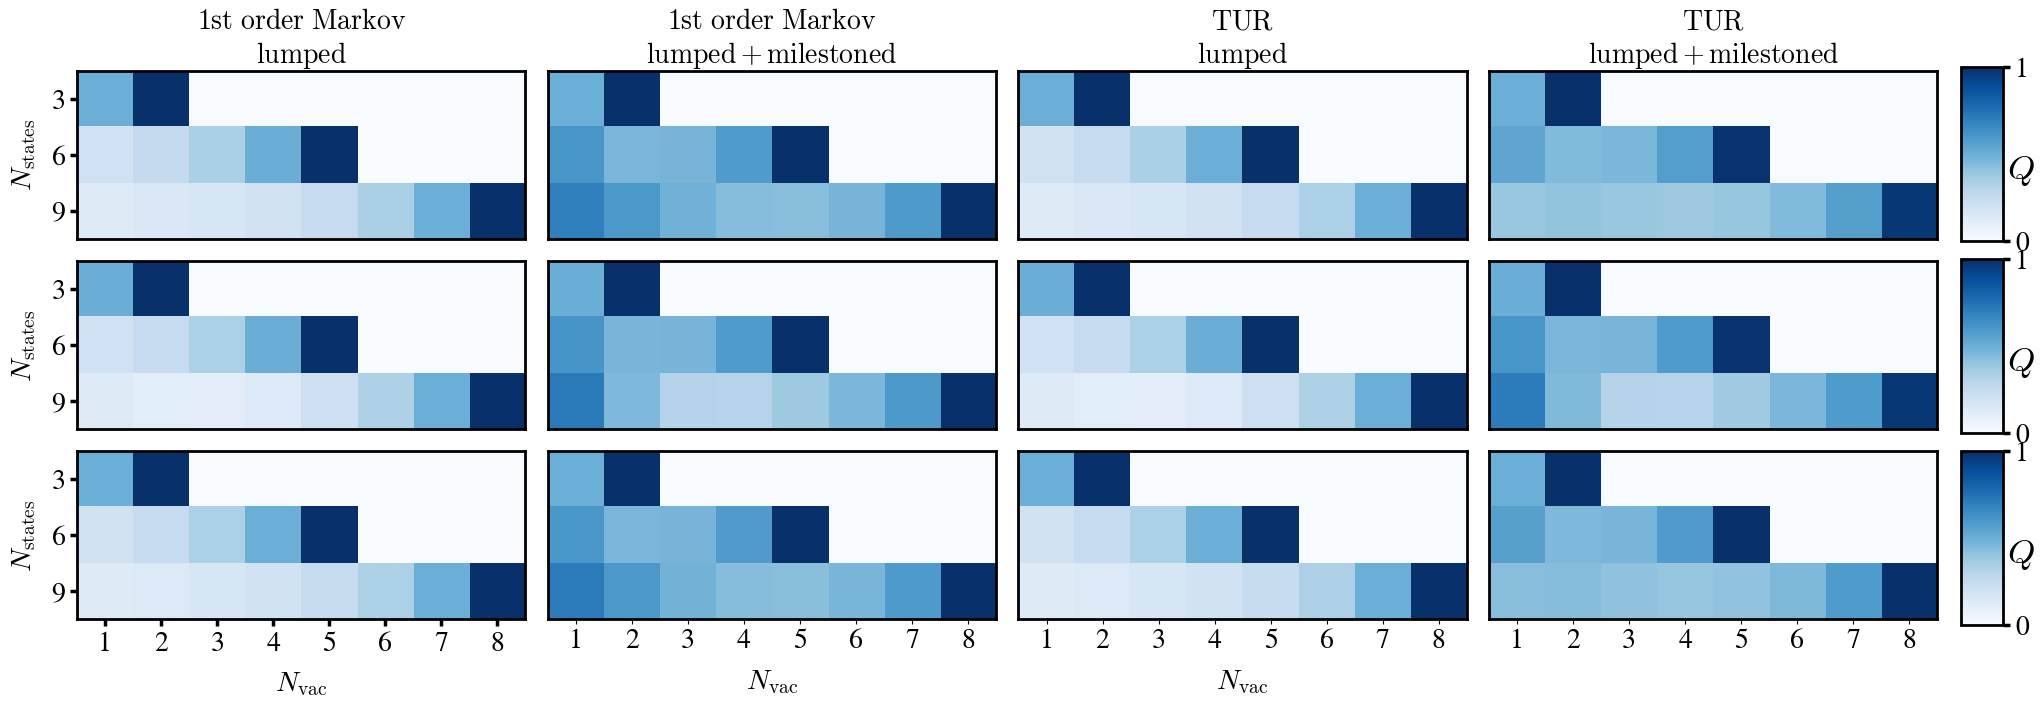

In [57]:
#Figure settings
fig, ax = plt.subplots(3,4, figsize = (24,12))
ax.ravel()

#Plot quality factors
for k in range(3):
    ax[k,0].matshow(Q1_lumped[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[k,1].matshow(Q1_mil[:,:,k],    cmap='Blues', vmin = 0, vmax = 1)
    ax[k,2].matshow(Q1_lumpedTUR[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[k,3].matshow(Q1_milTUR[:,:,k],  cmap='Blues', vmin = 0, vmax = 1)

#Set labels
ax[2,0].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
ax[2,1].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
ax[2,2].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
for k in range(3): ax[k,0].set_ylabel(r'$N_{\rm states}$', size = 20, labelpad = 10);

#Add titles
ax[0,0].set_title(r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[0,1].set_title(r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);
ax[0,2].set_title(r'$\rm TUR $' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[0,3].set_title(r'$\rm TUR$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);

for k in range(3):

    #Change axis
    ax[k,0].xaxis.set_ticks_position("bottom")
    ax[k,1].xaxis.set_ticks_position("bottom")
    ax[k,2].xaxis.set_ticks_position("bottom")
    ax[k,3].xaxis.set_ticks_position("bottom")

    #Set axis ticks
    ax[k,0].set_xticks([]), ax[k,1].set_xticks([]), ax[k,2].set_xticks([]), ax[k,3].set_xticks([])
    ax[k,0].set_yticks([0,1,2],['3','6','9'])
    ax[k,1].set_yticks([]), ax[k,2].set_yticks([]), ax[k,3].set_yticks([])

    #Set tick sizes
    ax[k,0].tick_params('both', length=5, width=2.5, which='major');
    ax[k,0].xaxis.set_tick_params(labelsize=20), ax[k,0].yaxis.set_tick_params(labelsize=20);
    ax[k,1].xaxis.set_tick_params(labelsize=20), ax[k,1].yaxis.set_tick_params(labelsize=20);
    ax[k,2].xaxis.set_tick_params(labelsize=20), ax[k,2].yaxis.set_tick_params(labelsize=20);
    ax[k,3].xaxis.set_tick_params(labelsize=20), ax[k,3].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[2,0].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
ax[2,1].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
ax[2,2].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
ax[2,3].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
        
#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Add a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap='Blues')
for k in range(3):
    cax = plt.axes([0.91, 0.582-0.16*k, 0.0175, 0.145])
    cb = plt.colorbar(cmap, cax=cax, ticks = np.array([0,1]))
    cb.ax.set_yticklabels(['0','1'])
    cb.ax.tick_params(labelsize=20, length = 5, width = 2.5)
    cb.set_label(r'$Q$', size = 25, rotation=0, labelpad = -6, y = 0.5)

### Calculate entropy production with second order semi-Markov approximation for various ring sizes and vacancies

In [ ]:
#Set constants
Nsteps = 10**8
Nslots = 9
Nmilestones = 3
pbias = 0.45

#Initialize arrays
Q2_lumped = np.zeros((3,Nslots-1,3))
Q2_mil    = np.zeros((3,Nslots-1,3))

In [ ]:
%%time
for i in range(1,4):
    for j in range(1,3*i):
        for k in range(3):
        
            #Construct trajectories
            full_traj, lump_traj, mil_traj = single_file(Nsteps,3*i,j,Nmilestones,pbias,k,True)
        
            #Calculate entropy production
            exact_entropy  = markov_entropy_calculator(full_traj,1)
            lump_entropy   = semi_markov_entropy_module(lump_traj,2)
            mil_entropy    = semi_markov_entropy_module(mil_traj,2)
        
            #Calculate quality factors
            Q2_lumped[i-1,j-1,k] = lump_entropy/exact_entropy
            Q2_mil[i-1,j-1,k]    = mil_entropy/exact_entropy
        
            print(i,j,Q2_lumped[i-1,j-1,k],Q2_mil[i-1,j-1,k])

### Show data

Q2_lumped = np.array([[[1.0002732 , 0.99990986, 0.99987024],
        [1.00011188, 0.99987568, 1.00082554],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.99864706, 1.00050679, 1.00191608],
        [0.68099351, 0.68732858, 0.68073322],
        [0.61063551, 0.61472946, 0.60952198],
        [0.66622146, 0.66934608, 0.66634001],
        [1.00002429, 0.99993861, 1.11325189],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.00225799, 1.00094215, 1.00212671],
        [0.57611404, 0.57105024, 0.57226026],
        [0.46150098, 0.44618657, 0.45771013],
        [0.42187478, 0.41085927, 0.41928983],
        [0.42365506, 0.42060667, 0.4220378 ],
        [0.46735451, 0.47017774, 0.46739893],
        [0.58967568, 0.59394392, 0.5913227 ],
        [0.99984424, 1.00004214, 0.99669306]]])

Q2_mil = np.array([[[1.00027338, 0.99991164, 0.99987062],
        [1.00011197, 0.99987577, 1.00110829],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.00090829, 1.00254956, 0.99978665],
        [1.01643066, 1.01512448, 1.01416303],
        [0.95111733, 0.95042809, 0.94878496],
        [0.89006436, 0.89360723, 0.89161502],
        [1.00019779, 1.00016197, 1.03985809],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.03205844, 0.95572777, 0.9840258 ],
        [0.99413546, 0.95150176, 0.98987389],
        [0.99990914, 0.96131994, 1.01389448],
        [0.98858877, 0.94986233, 0.99227188],
        [0.93230968, 0.92605695, 0.93957417],
        [0.8802072 , 0.89094846, 0.88832366],
        [0.85654867, 0.86489604, 0.86397039],
        [0.99966757, 1.00057739, 0.99859124]]])

### Plot data

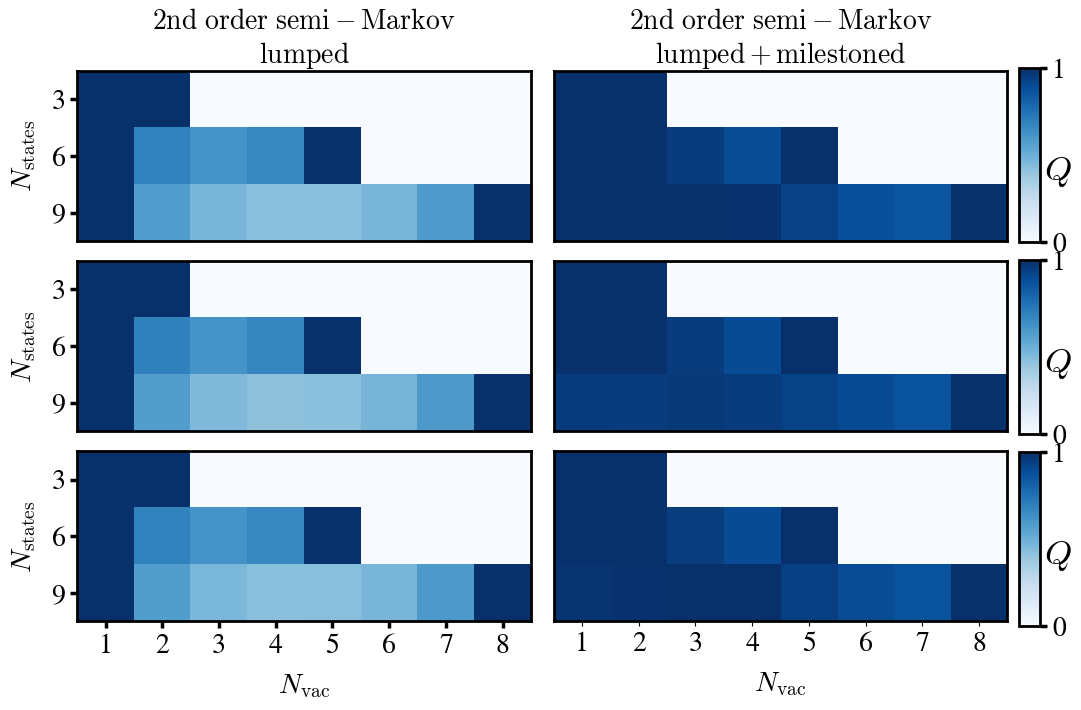

In [60]:
#Figure settings
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax.ravel()

#Plot quality factors
for k in range(3):
    ax[k,0].matshow(Q2_lumped[:,:,k], cmap='Blues',  vmin = 0, vmax = 1)
    ax[k,1].matshow(Q2_mil[:,:,k],    cmap='Blues',  vmin = 0, vmax = 1)

#Set labels
ax[2,0].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
ax[2,1].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);
for k in range(3): ax[k,0].set_ylabel(r'$N_{\rm states}$', size = 20, labelpad = 10);

#Add titles
ax[0,0].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$',     fontsize = 20);
ax[0,1].set_title(r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped + milestoned$',     fontsize = 20);

for k in range(3):

    #Change axis
    ax[k,0].xaxis.set_ticks_position("bottom")
    ax[k,1].xaxis.set_ticks_position("bottom")

    #Set axis ticks
    ax[k,0].set_xticks([])
    ax[k,1].set_xticks([])
    ax[k,0].set_yticks([0,1,2],['3','6','9'])
    ax[k,1].set_yticks([])

    #Set tick sizes
    ax[k,0].tick_params('both', length=5, width=2.5, which='major');
    ax[k,0].xaxis.set_tick_params(labelsize=20), ax[k,0].yaxis.set_tick_params(labelsize=20);
    ax[k,1].xaxis.set_tick_params(labelsize=20), ax[k,1].yaxis.set_tick_params(labelsize=20);

#Set axis ticks
ax[2,0].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
ax[2,1].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'])
    
#Adjust width subplots
plt.subplots_adjust(wspace=0.05, hspace = -0.65)

#Add a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap='Blues')
for k in range(3):
    cax = plt.axes([0.91, 0.582-0.16*k, 0.0175, 0.145])
    cb = plt.colorbar(cmap, cax=cax, ticks = np.array([0,1]))
    cb.ax.set_yticklabels(['0','1'])
    cb.ax.tick_params(labelsize=20, length = 5, width = 2.5)
    cb.set_label(r'$Q$', size = 25, rotation=0, labelpad = -6, y = 0.5)
    
#Save figure
#plt.savefig('./Plots/quality_factor_second_order_Markov_uniform_driven.pdf', bbox_inches = 'tight', dpi = 100)

### Plot data into one figure

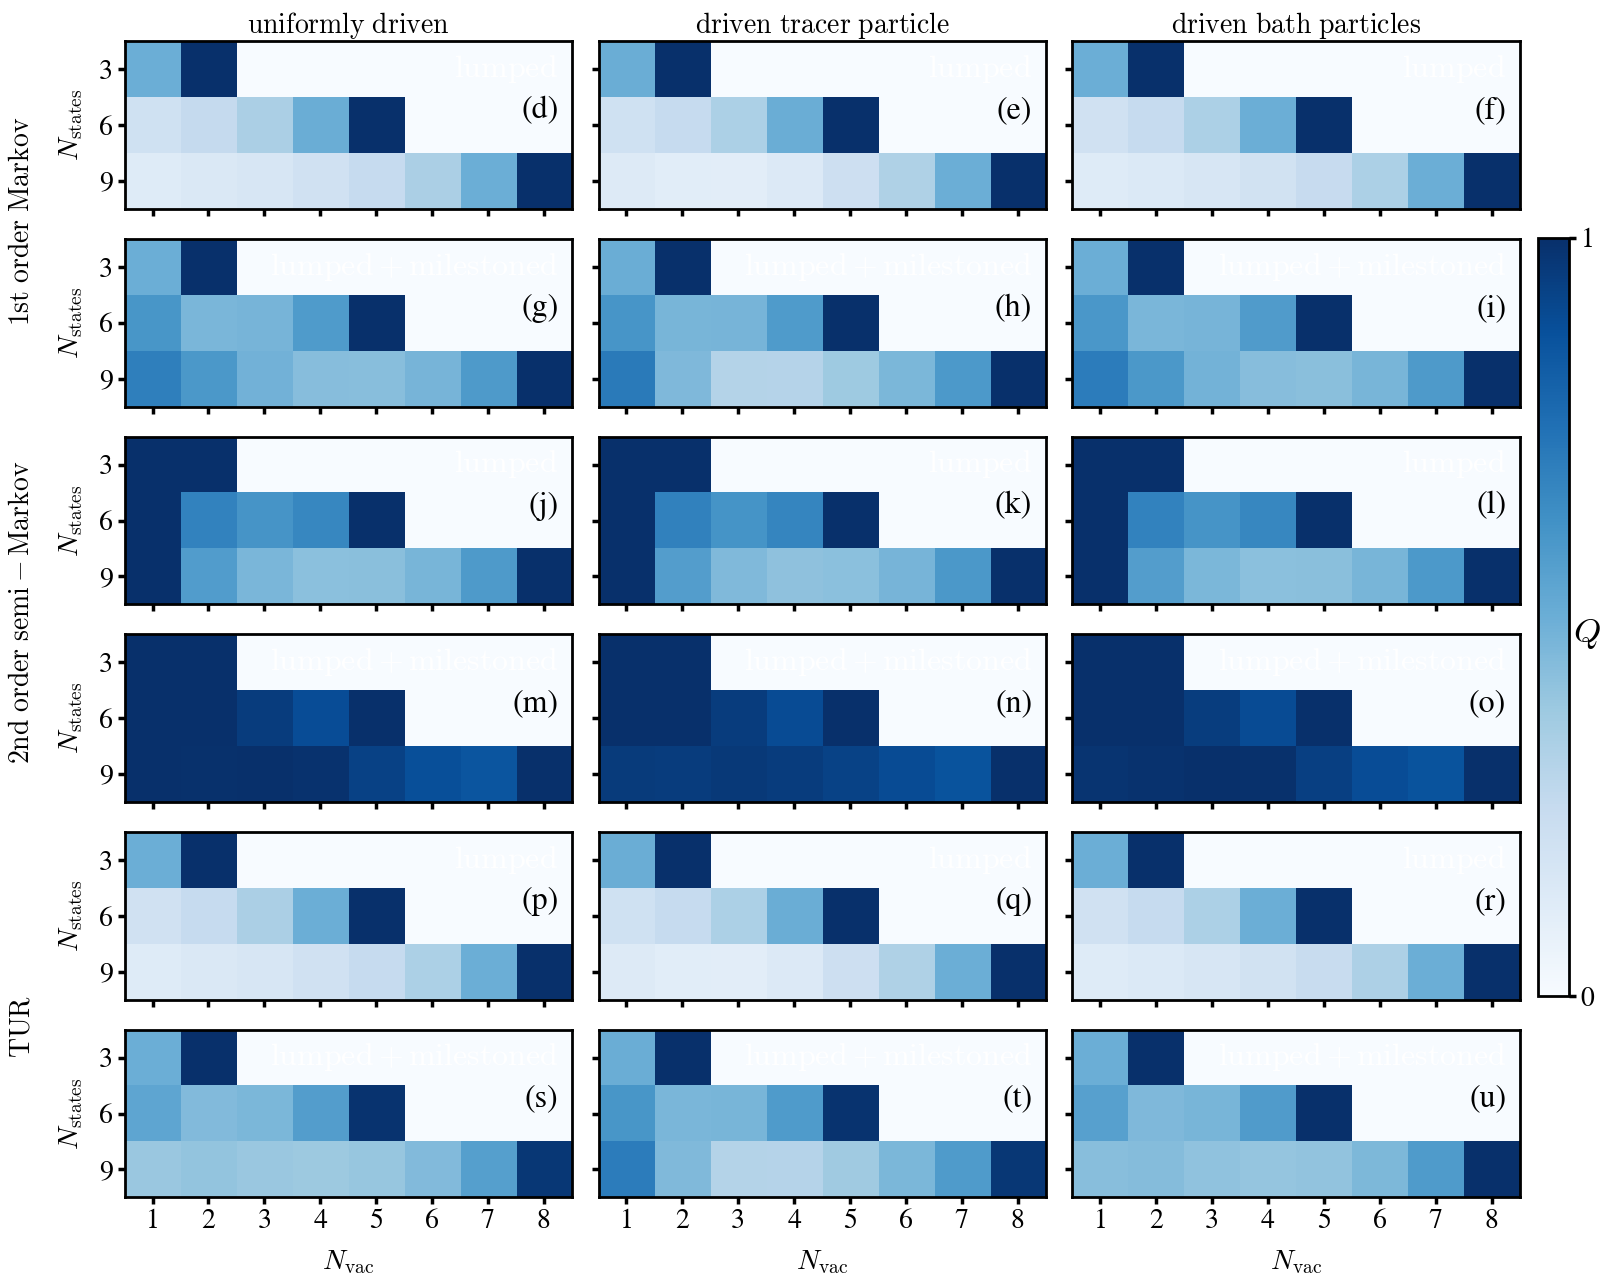

In [61]:
#Figure settings
fig, ax = plt.subplots(6,3, figsize = (18,24))
ax.ravel()

#Plot quality factors
for k in range(3):
    ax[4,k].matshow(Q1_lumpedTUR[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[5,k].matshow(Q1_milTUR[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[0,k].matshow(Q1_lumped[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[1,k].matshow(Q1_mil[:,:,k],    cmap='Blues', vmin = 0, vmax = 1)
    ax[2,k].matshow(Q2_lumped[:,:,k], cmap='Blues', vmin = 0, vmax = 1)
    ax[3,k].matshow(Q2_mil[:,:,k],    cmap='Blues', vmin = 0, vmax = 1)

    #Set x-label
    ax[5,k].set_xlabel(r'$N_{\rm vac}$', size = 20, labelpad = 10);

#Set y-label
for k in range(6): ax[k,0].set_ylabel(r'$N_{\rm states}$', size = 20, labelpad = 10);
    
for k in range(6):
    for i in range(3):
        
        #Change axis
        ax[k,i].xaxis.set_ticks_position("bottom")
        
        #Set axis ticks
        ax[k,i].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'],color='w')
        ax[k,0].set_yticks([0,1,2],['3','6','9'])
        ax[k,1].set_yticks([0,1,2],['3','6','9'],color='w'), ax[k,2].set_yticks([0,1,2],['3','6','9'],color='w')

        #Set tick sizes
        ax[k,i].tick_params('both', length=5, width=2.5, which='major');
        ax[k,i].xaxis.set_tick_params(labelsize=20), ax[k,i].yaxis.set_tick_params(labelsize=20);

        #Set axis ticks
        ax[5,i].set_xticks([0,1,2,3,4,5,6,7],['1','2','3','4','5','6','7','8'],color='black')

#Add titles
ax[0,0].set_title(r'$\rm uniformly \ driven$',     fontsize = 20);
ax[0,1].set_title(r'$\rm driven \ tracer \ particle$',  fontsize = 20);
ax[0,2].set_title(r'$\rm driven \ bath \ particles$',     fontsize = 20);

#Add text + figure labels
ax[4,0].text(-0.2, -0.35, r'$\rm TUR $', rotation = 90,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[4,0].transAxes, fontsize=20)
ax[0,0].text(-0.2, -0.7, r'$\rm 1st \ order \ Markov$', rotation = 90,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[0,0].transAxes, fontsize=20)
ax[2,0].text(-0.2, -0.95, r'$\rm 2nd \ order \ semi-Markov$', rotation = 90,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[2,0].transAxes, fontsize=20)
for k in range(3):
        for j in range(3):
            ax[2*j,k].text(0.97, 0.74, r'$\rm lumped$', color = 'white',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax[2*j,k].transAxes, fontsize=23)
            ax[1+2*j,k].text(0.97, 0.74, r'$\rm lumped + milestoned$', color = 'white',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax[1+2*j,k].transAxes, fontsize=23)
            
label_arr = np.array([r'(d)',r'(e)',r'(f)',r'(g)',r'(h)',r'(i)',r'(j)',r'(k)',r'(l)',r'(m)',r'(n)',r'(o)',r'(p)',r'(q)',r'(r)',r'(s)',r'(t)',r'(u)'])
count = 0
for k in range(6):
    for j in range(3):
            ax[k,j].text(0.97, 0.5, label_arr[count], color = 'black',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax[k,j].transAxes, fontsize=23)
            count += 1
            

#Adjust width subplots
plt.subplots_adjust(wspace=0.06, hspace = -0.77)

#Add a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap='Blues')
cax = plt.axes([0.91, 0.338, 0.0175, 0.316])
cb = plt.colorbar(cmap, cax=cax, ticks = np.array([0,1]))
cb.ax.set_yticklabels(['0','1'])
cb.ax.tick_params(labelsize=20, length = 5, width = 2.5)
cb.set_label(r'$Q$', size = 25, rotation=0, labelpad = -6, y = 0.5)
    
#Save figure
#plt.savefig('./Plots/quality_factor_single_file.pdf', bbox_inches = 'tight', dpi = 200)

### Calculate entropy production as a function of trajectory length (for SM)

In [19]:
#Set timesteps
timesteps = np.array([10000,10**5,10**6,10**7,10**8])

#Number of repetitions
num_rep = 20

#Initialize arrays
Q1_lumped        = np.zeros((len(timesteps),num_rep))
Q2_lumped        = np.zeros((len(timesteps),num_rep))
Q1_mil           = np.zeros((len(timesteps),num_rep))
Q2_mil           = np.zeros((len(timesteps),num_rep))

In [51]:
%%time
for ind, i in enumerate(timesteps):
    for j in range(num_rep):

        #Construct trajectories
        full_traj, lump_traj, mil_traj = single_file(i,9,1,3,0.46,0,True)
        

        #Calculate entropy production
        exact_entropy  = markov_entropy_calculator(full_traj,1)
        lump1_entropy  = markov_entropy_calculator(lump_traj,1)
        mil1_entropy   = markov_entropy_calculator(mil_traj,1)
        try:    lump2_entropy = semi_markov_entropy_module(lump_traj,2)
        except: lump2_entropy = 0
        try:    mil2_entropy = semi_markov_entropy_module(mil_traj,2)
        except: mil2_entropy = 0
        #Calculate quality factors
        Q1_lumped[ind,j] = lump1_entropy/exact_entropy
        Q1_mil[ind,j]    = mil1_entropy/exact_entropy
        Q2_lumped[ind,j] = lump2_entropy/exact_entropy
        Q2_mil[ind,j]    = mil2_entropy/exact_entropy
        
        print(ind)

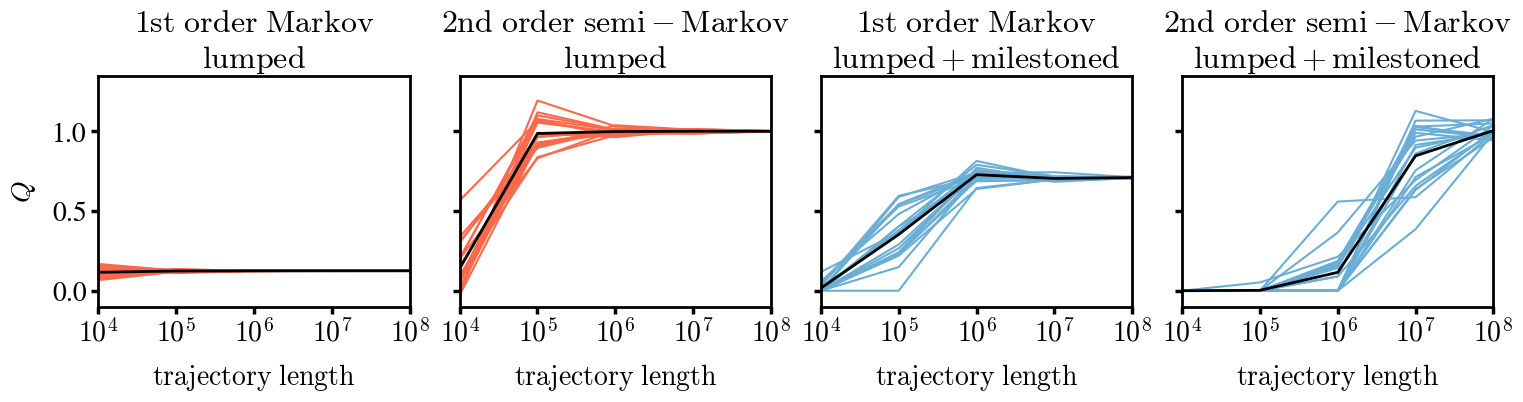

In [52]:
#Figure settings
fig, ax = plt.subplots(1,4, figsize = (18,3), sharey = True)
ax.ravel()


#Plot quality factors vs.  trajectory length
ax[0].plot(Q1_lumped, color = cm.Reds(0.5))
ax[0].plot(np.nanmean(Q1_lumped, axis=1), color = 'black', linewidth = 2)

ax[1].plot(Q2_lumped, color = cm.Reds(0.5))
ax[1].plot(np.nanmean(Q2_lumped, axis=1), color = 'black', linewidth = 2)

ax[2].plot(Q1_mil, color = cm.Blues(0.5))
ax[2].plot(np.nanmean(Q1_mil, axis=1), color = 'black', linewidth = 2)

ax[3].plot(Q2_mil, color = cm.Blues(0.5))
ax[3].plot(np.nanmean(Q2_mil, axis=1), color = 'black', linewidth = 2)

for i in range(4): 
    
    #Set axis limits
    ax[i].set_xlim([0,4])
    ax[i].set_ylim([-0.1,1.35])
    
    #Set axis ticks
    ax[i].set_xticks([0,1,2,3,4],[r'$10^{4}$',r'$10^{5}$',r'$10^{6}$',r'$10^{7}$',r'$10^{8}$'],color='black')
    
    #Set axis tick size
    ax[i].tick_params('both', length=5, width=2.5, which='major');
    ax[i].xaxis.set_tick_params(labelsize=20), ax[i].yaxis.set_tick_params(labelsize=20);
        
    #Set x-axis label
    ax[i].set_xlabel(r'$\rm trajectory \ length$', size = 20, labelpad = 10);

#Set y-axis label
ax[0].set_ylabel(r'$Q$', size = 20, labelpad = 10);

#Set title
ax[0].text(0.5, 1, r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[0].transAxes, fontsize=23)
ax[1].text(0.5, 1, r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[1].transAxes, fontsize=23)
ax[2].text(0.5, 1, r'$\rm 1st \ order \ Markov$' +'\n'+ r'$\rm lumped + milestoned$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[2].transAxes, fontsize=23)
ax[3].text(0.5, 1, r'$\rm 2nd \ order \ semi-Markov$' +'\n'+ r'$\rm lumped+milestoned$', color = 'black',
                        verticalalignment='bottom', horizontalalignment='center',
                        transform=ax[3].transAxes, fontsize=23)
    
#Adjust width subplots
plt.subplots_adjust(wspace=0.16)

#Save figure
#plt.savefig('./Plots/quality_factor_trajectory_length_analysis.pdf', bbox_inches = 'tight', dpi = 200)